In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
from astropy.stats import sigma_clipped_stats
from photutils import DAOStarFinder, CircularAperture
from astropy.visualization import SqrtStretch, simple_norm
from astropy.visualization.mpl_normalize import ImageNormalize
import astropy.io.fits as pf
plt.rcParams['figure.figsize'] = (15,9)

In [74]:
def SourceDetect(file, SIG, FWHM, THRESH, store = False, PlotStars = False, PrintStars = False): #file = string
    image = pf.open(file)
    im = image[0].data
    mean, median, std = sigma_clipped_stats(im, sigma=SIG)
    daofind = DAOStarFinder(fwhm = FWHM, threshold = THRESH * std) 
    sources = daofind(im - median)
    positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
    if(PlotStars):
        apertures = CircularAperture(positions, r = 6.) #choose a number large enough to go over the stars
        norm = simple_norm(im, 'log')
        plt.imshow(im, cmap = 'seismic', norm = norm, origin = 'lower')
        #apertures.plot(color = 'blue', lw = 0.5, alpha = 1)
        for i in range(0, len(sources)):
            plt.text(sources[i]['xcentroid'], sources[i]['ycentroid'], i, color='black', alpha = 0.3);
    if(PrintStars):
        print(positions)
    if(store):
        return positions

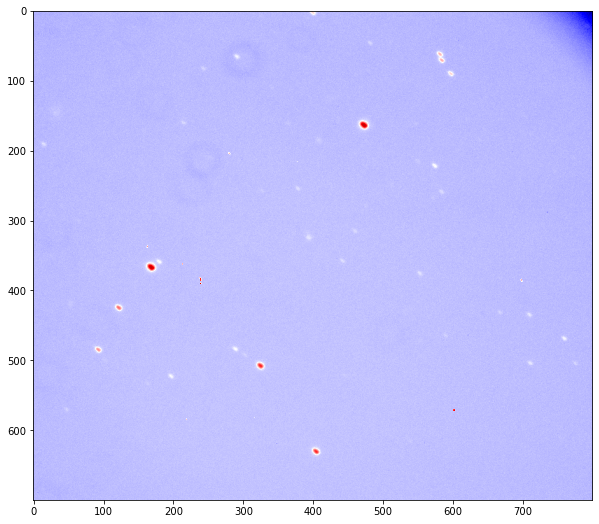

In [75]:
im = pf.getdata('red_asteroid/reduced_UCD_0222.fits')
norm = simple_norm(im, 'log')
plt.imshow(im, cmap = 'seismic', norm = norm)

In [60]:
p1 = np.loadtxt('position1_coords.txt')
p2 = np.loadtxt('position2_coords.txt')

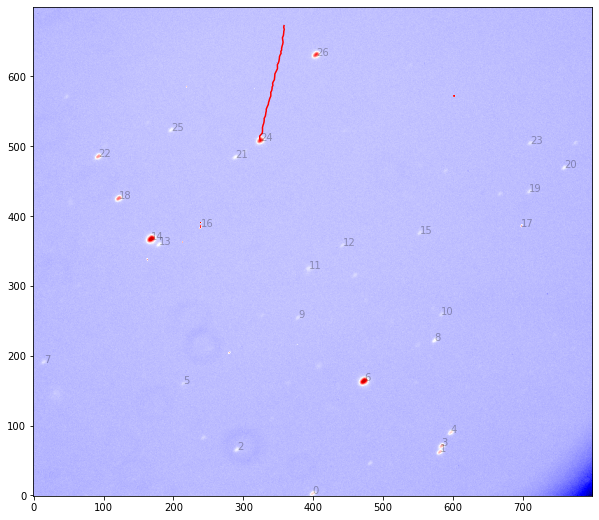

In [76]:
SourceDetect('red_asteroid/reduced_UCD_0222.fits', 3, 5.7, 8, False, True)
plt.plot(p1[:,0], p1[:,1], 'r')

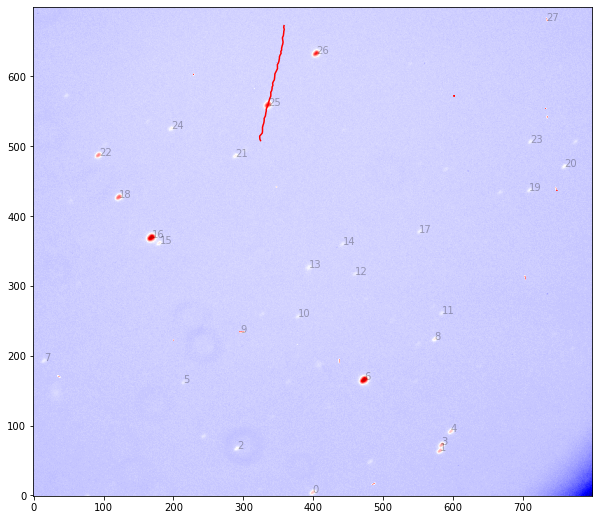

In [77]:
SourceDetect('red_asteroid/reduced_UCD_0240.fits', 3, 5.7, 8, False, True)
plt.plot(p1[:,0], p1[:,1], 'r')

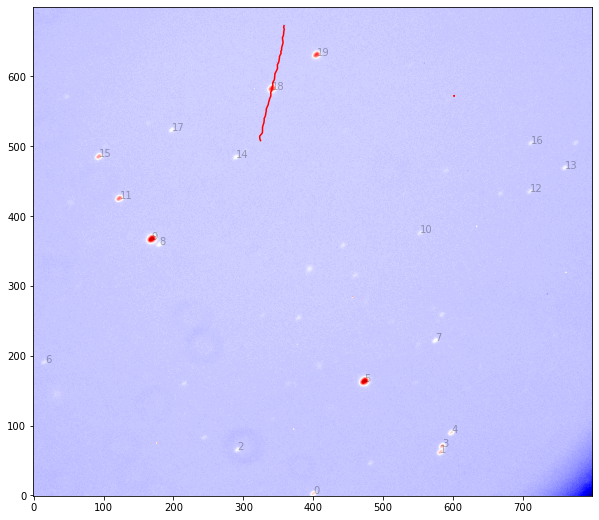

In [78]:
SourceDetect('red_asteroid/reduced_UCD_0250.fits', 3, 5.7, 8, False, True)
plt.plot(p1[:,0], p1[:,1], 'r')

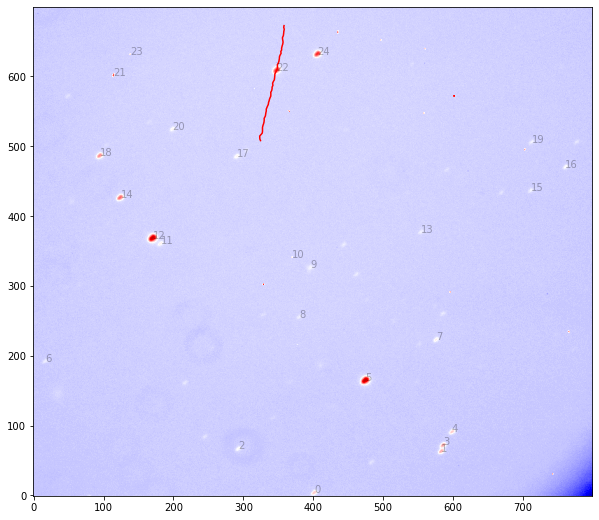

In [79]:
SourceDetect('red_asteroid/reduced_UCD_0260.fits', 3, 5.7, 8, False, True)
plt.plot(p1[:,0], p1[:,1], 'r')

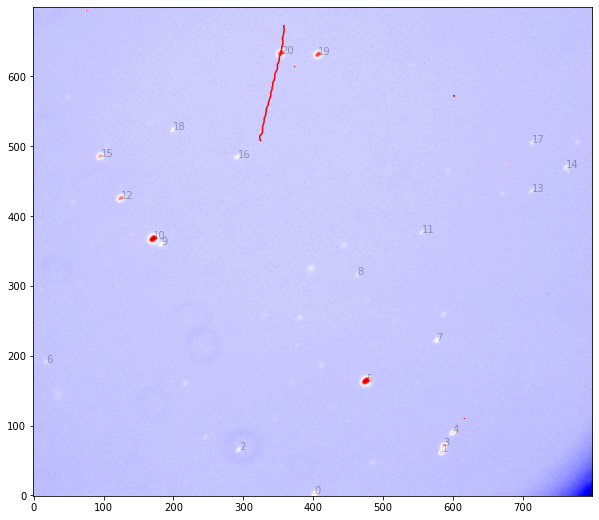

In [80]:
SourceDetect('red_asteroid/reduced_UCD_0270.fits', 3, 5.7, 8, False, True)
plt.plot(p1[:,0], p1[:,1], 'r')

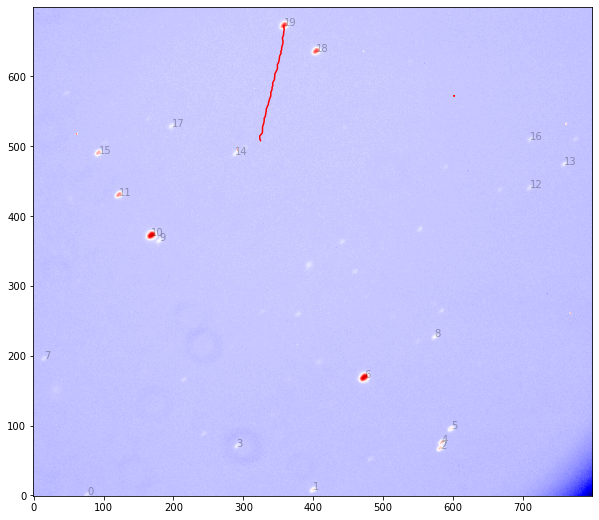

In [81]:
SourceDetect('red_asteroid/reduced_UCD_0284.fits', 3, 5.7, 8, False, True)
plt.plot(p1[:,0], p1[:,1], 'r')

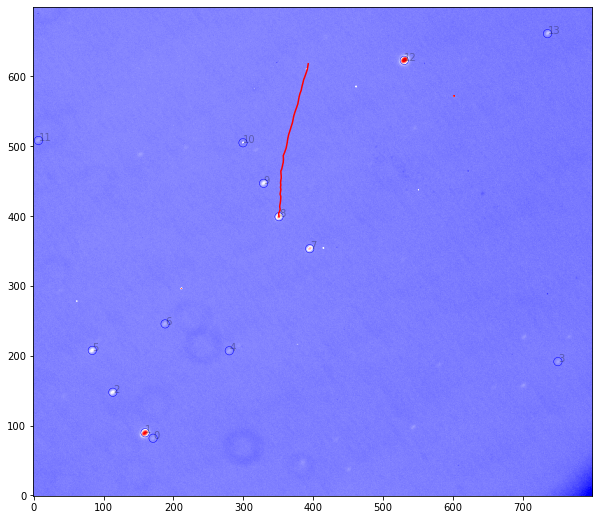

In [68]:
SourceDetect('red_asteroid/reduced_UCD_0285.fits', 3, 5.7, 8, False, True)
plt.plot(p2[:,0], p2[:,1], 'r')

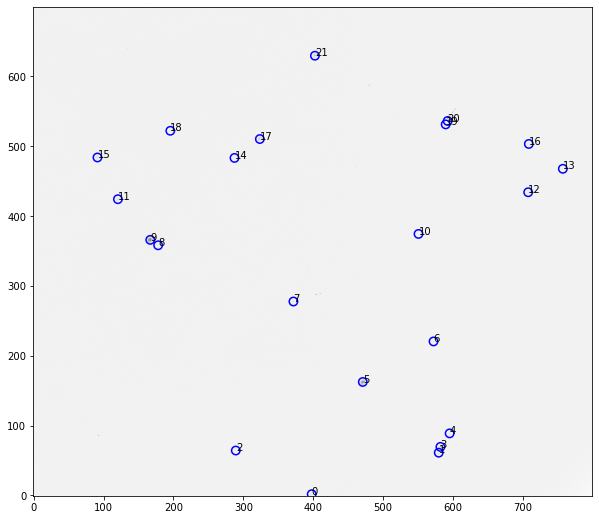

In [6]:
#Reference Star
ref1 = SourceDetect('red_asteroid/reduced_UCD_0223.fits', 3, 5.7, 8, True, True)

In [7]:
ref1[21]

array([402.41167365, 629.18144534])